In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.metrics import mean_squared_error as mse
import math as ma
import pandas as pd

## Importation des données

In [3]:
file_path= 'C:/Users/Mr K/Desktop/Studies/APST2/Mathieu/p2022-resultats-regions-t1.csv'
presidential = pd.read_csv(file_path)

In [4]:
columns=np.array(presidential.columns.tolist()).reshape((1,52))

In [5]:
values=np.array(presidential.values.tolist())

In [6]:
dataset=np.concatenate((columns,values))

In [7]:
dataset.shape

(19, 52)

In [8]:
candidats=dataset[:,16:28]

## Visualisation des données

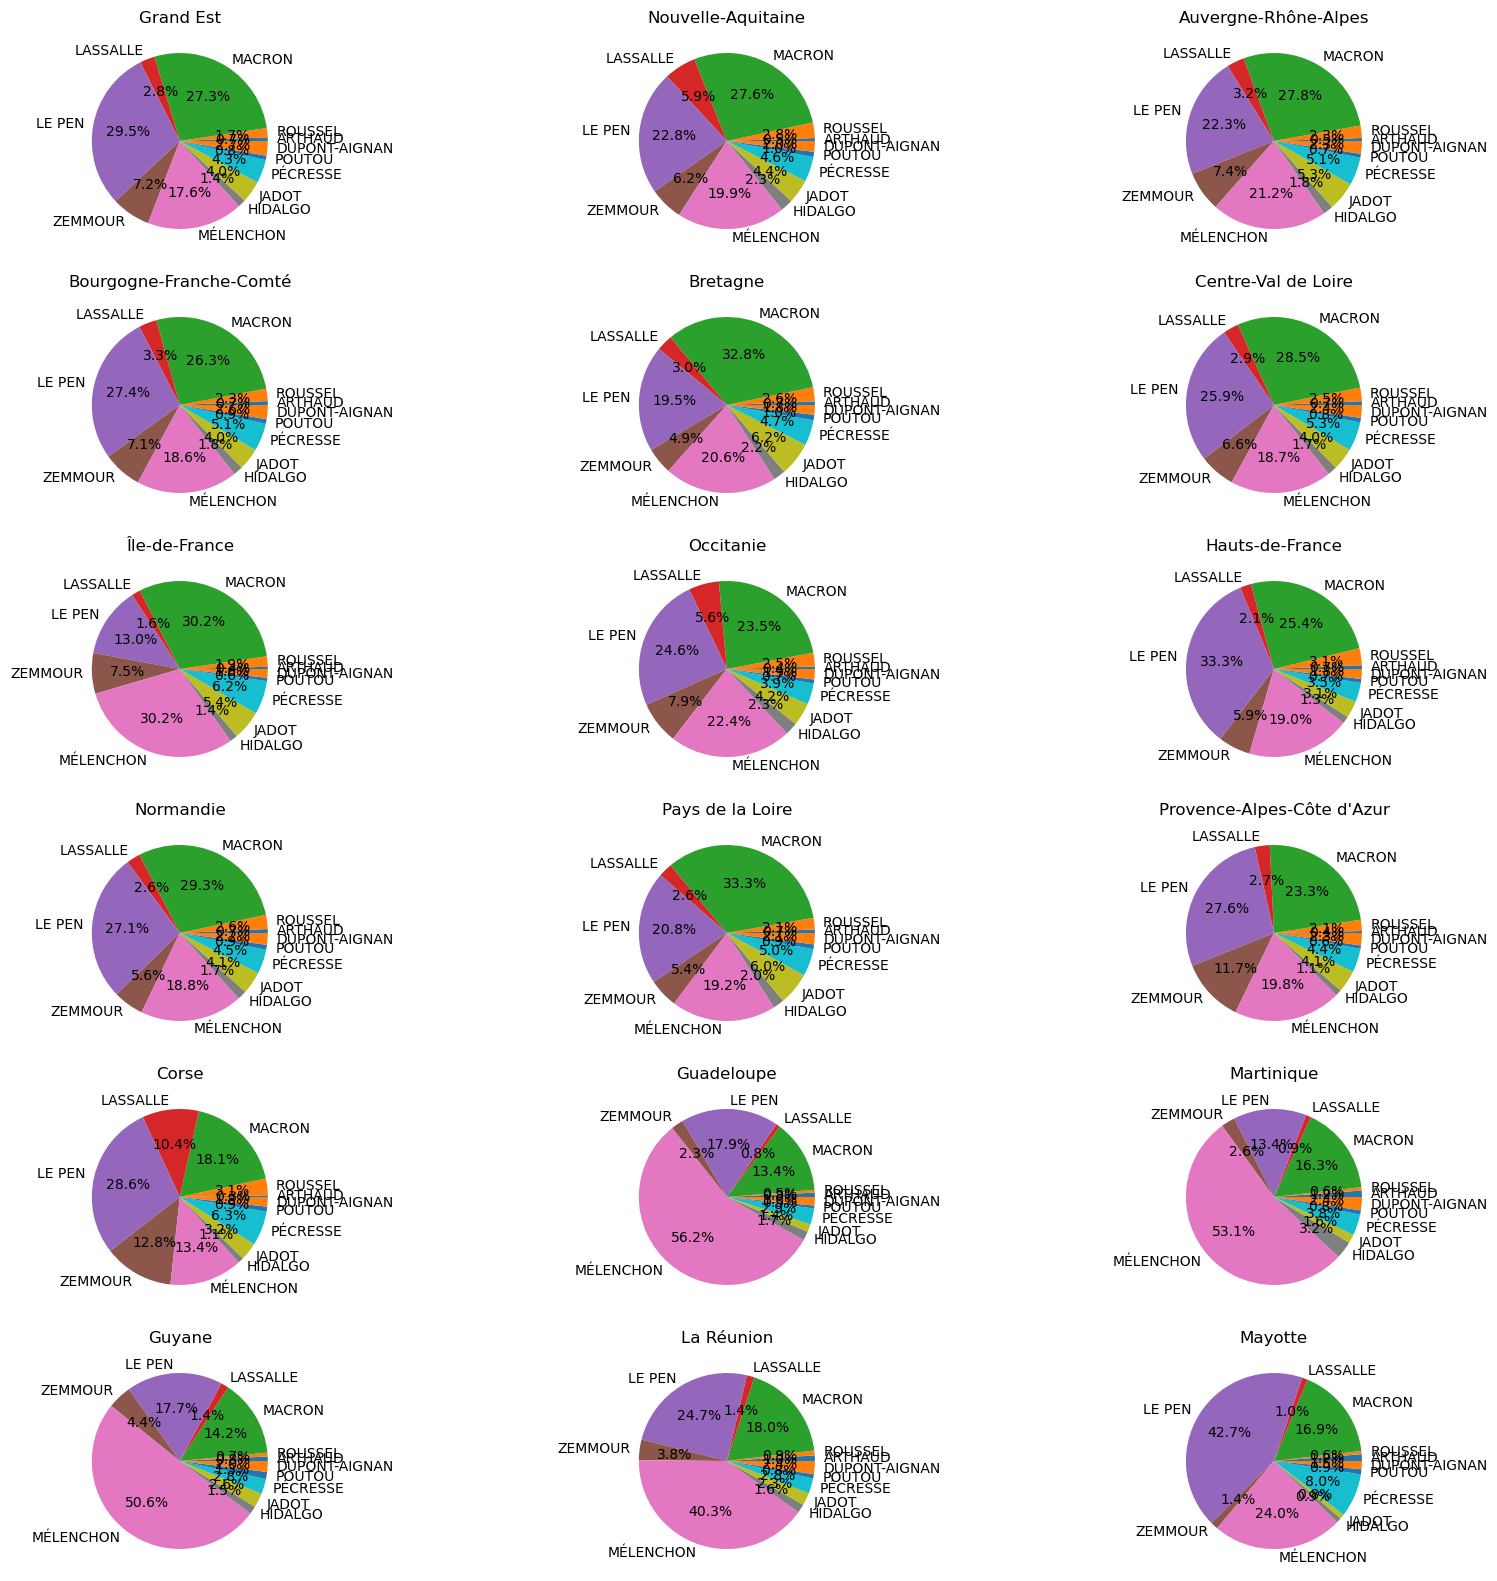

In [9]:
plt.figure(figsize=(20,20))
for i in range(18):
    plt.subplot(6,3,i+1)
    D=candidats[i+1,:]
    plt.pie(D,labels=candidats[0,:],autopct='%1.1f%%')
    plt.title(dataset[i+1,1]) 

In [346]:
def piechart(k):
    j=0
    for i in range(18):
        if dataset[i+1,0]==str(k):
            j=i+1
    D=candidats[j,:]
    plt.pie(D,labels=candidats[0,:],autopct='%1.1f%%')

Si on cherche à visualiser clairement le diagramme pour une région spécifique, on peut utiliser la fonction piechart en indiquant en paramètre le code région.
Par exemple pour la région Grand Est on a:

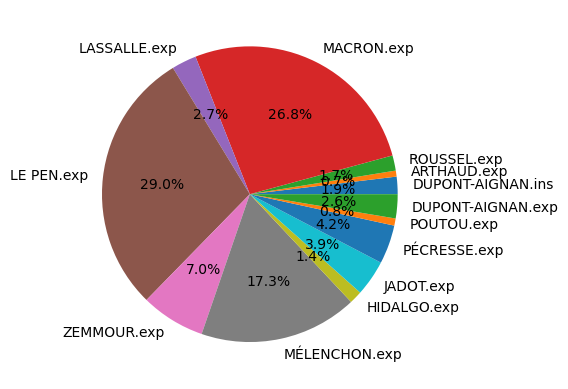

In [350]:
piechart(44)

## Implémentation de modèles de mélanges gaussiens

### Principle Component Analysis

In [336]:
candidats=dataset[:,39:]

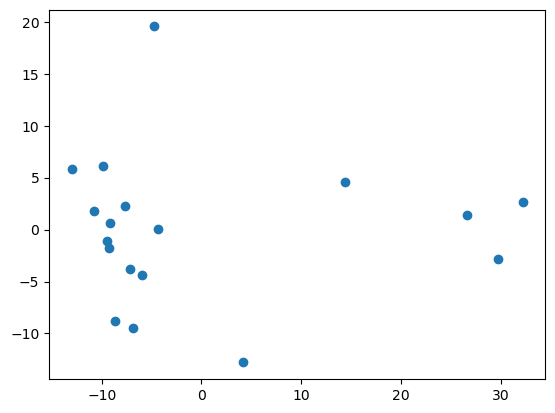

[-10.7974785   -7.19517835  -5.92435394  -9.17612312  -6.88094972
  -9.23113789   4.14473008  -4.33341845  -9.82924737  -9.49833732
  -8.65749656  -7.71222978 -13.01381077  32.17468084  29.72370633
  26.6363024   14.34146578  -4.77112369]


In [337]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(candidats[1:,:])  # ajuster la PCA sur les données 
pca_data = pca.transform(candidats[1:,:])  
ACP0 = pca_data[:,0]    # extraction premiere composante
ACP1 = pca_data[:,1]    # extraction deuxieme composante

plt.scatter(ACP0,ACP1)
plt.show()
print(ACP0)

In [338]:
pca.components_[0:2,:]

array([[-1.86092247e-02,  8.83830252e-03, -4.84597516e-02,
        -2.95304783e-01, -7.97744276e-02, -2.74862786e-01,
        -1.12723401e-01,  8.99761557e-01,  1.15400985e-02,
        -5.83967645e-02, -4.77600852e-02, -2.21172068e-04,
        -2.63678795e-03],
       [-2.37552755e-02,  1.56731112e-02, -3.81438854e-02,
        -5.67875098e-01, -3.65910309e-04,  7.99216560e-01,
        -6.69753142e-02,  3.80419676e-02, -4.04627378e-02,
        -1.66824470e-01,  3.24662119e-02,  2.08880229e-03,
        -6.83923680e-03]])

In [339]:
candidats[0,:]

array(['DUPONT-AIGNAN.ins', 'ARTHAUD.exp', 'ROUSSEL.exp', 'MACRON.exp',
       'LASSALLE.exp', 'LE PEN.exp', 'ZEMMOUR.exp', 'MÉLENCHON.exp',
       'HIDALGO.exp', 'JADOT.exp', 'PÉCRESSE.exp', 'POUTOU.exp',
       'DUPONT-AIGNAN.exp'], dtype='<U32')

On remarque bien que les features 'Macron', 'Mélenchon', 'Le Pen' et 'Zemmour' ont contribué le plus à la première composante de PCA et pour la deuxième composante on trouve que 'Macron' et 'Le Pen' sont les plus grands contributeurs.
Cela est prévisible puisque dans toutes les régions, ces candidats reçoivent le plus de vote.

### Clustering

### 2 clusters

C:\Users\Mr K\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


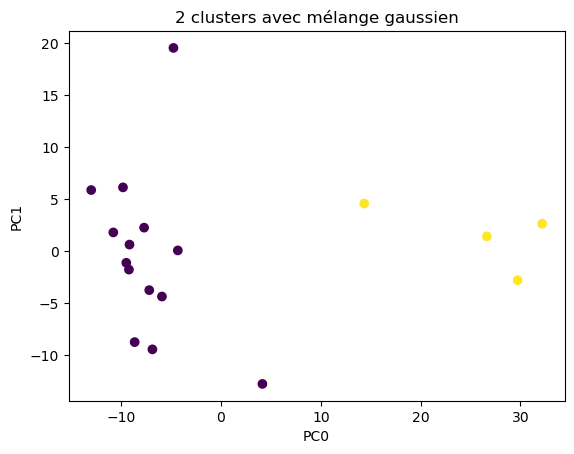

Le 1er cluster contient:
Grand Est
Nouvelle-Aquitaine
Auvergne-Rhône-Alpes
Bourgogne-Franche-Comté
Bretagne
Centre-Val de Loire
Île-de-France
Occitanie
Hauts-de-France
Normandie
Pays de la Loire
Provence-Alpes-Côte d'Azur
Corse
Mayotte
Le  2 ème cluster contient:
Guadeloupe
Martinique
Guyane
La Réunion


In [344]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

n=2
gmm = GaussianMixture(n)
gmm.fit(candidats[1:,:])


# Get the cluster assignments for each data point
labels = gmm.predict(candidats[1:,:])

import matplotlib.pyplot as plt

plt.scatter(pca_data[:,0], pca_data[:,1], c=labels)
plt.title('2 clusters avec mélange gaussien')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

print('Le 1er cluster contient:')
indices=(labels==0)
indices=[int(j) for j in indices]
for j in range(18):
    if indices[j]==1:
            print(dataset[j+1,1])
for i in range(1,n):
    print('Le ',i+1,'ème cluster contient:')
    indices=(labels==i)
    indices=[int(j) for j in indices]
    for j in range(18):
        if indices[j]==1:
            print(dataset[j+1,1])

On remarque que le clustering en 2 divise à peu près les régions en France métropolitaine et régions outre-mer à l'exception de Mayotte.
Cette division peut être du au fait qu'en région outre-mer on tend à voter plus Mélenchon et on vote beaucoup moins Macron et Le Pen par rapport à la France métropolitaine.
Dans la région Mayotte, on a une domination de Le Pen et ainsi on la trouve dans le premier cluster

Si on visualise éxactement les régions outre-mer on trouve le graphe suivant:

Text(0, 0.5, 'PC1')

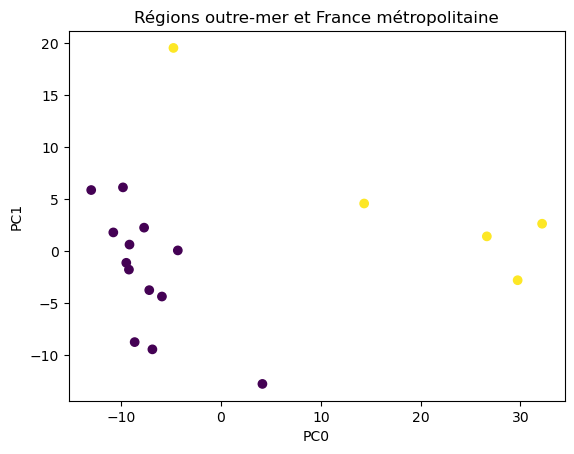

In [345]:
y=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]
plt.scatter(pca_data[:,0], pca_data[:,1], c=y)
plt.title('Régions outre-mer et France métropolitaine')
plt.xlabel('PC0')
plt.ylabel('PC1')

On trouve une claire ressemblance entre ce que nous donne le clustering et ce dernier graphe.

### 3 Clusters

Puisque la majorité des votes sont partagés entre Macron, Mélenchon et Le Pen, il est naturel qu'on essaie de faire un clustering avec 3 clusters et de voir si cela est reflété. 

C:\Users\Mr K\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


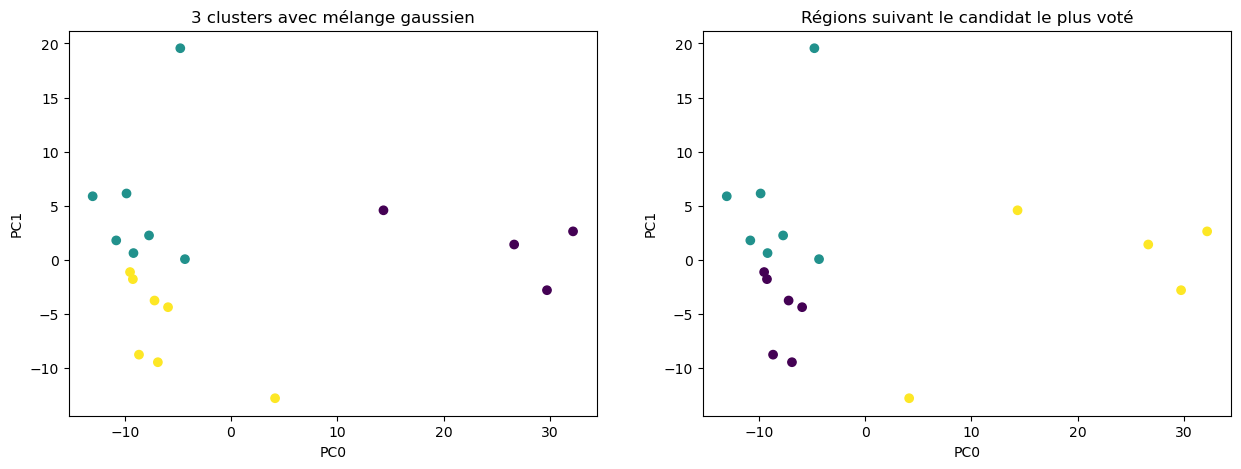

Le 1er cluster contient:
Guadeloupe
Martinique
Guyane
La Réunion
Le 2 ème cluster contient:
Grand Est
Bourgogne-Franche-Comté
Occitanie
Hauts-de-France
Provence-Alpes-Côte d'Azur
Corse
Mayotte
Le 3 ème cluster contient:
Nouvelle-Aquitaine
Auvergne-Rhône-Alpes
Bretagne
Centre-Val de Loire
Île-de-France
Normandie
Pays de la Loire


In [356]:
n=3
gmm = GaussianMixture(n)
gmm.fit(candidats[1:,:])

labels = gmm.predict(candidats[1:,:])
pca = PCA(n_components=2)
pca_data = pca.fit_transform(candidats[1:,:])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.scatter(pca_data[:,0], pca_data[:,1], c=labels)
ax1.set_title('3 clusters avec mélange gaussien')
ax1.set_xlabel('PC0')
ax1.set_ylabel('PC1')

indices=[]
for j in range(18):
    indices.append(np.argmax(candidats[j+1,[3,5,7]]))
ax2.set_title('Régions suivant le candidat le plus voté')
ax2.set_xlabel('PC0')
ax2.set_ylabel('PC1')
ax2.scatter(pca_data[:,0], pca_data[:,1], c=indices)

plt.show()

print('Le 1er cluster contient:')
indices=(labels==0)
indices=[int(j) for j in indices]
for j in range(18):
    if indices[j]==1:
            print(dataset[j+1,1])
for i in range(1,n):
    print('Le',i+1,'ème cluster contient:')
    indices=(labels==i)
    indices=[int(j) for j in indices]
    for j in range(18):
        if indices[j]==1:
            print(dataset[j+1,1])

Le modèle de mélange gaussien n'arrive pas à séparer les clusters exactement suivant le pourcentage de vote le plus élevé.
En fait si on éxecute le programme plusieurs fois on trouve que les clusters varient d'une éxecution à l'autre.
Mais ce qui reste invariant c'est que la majorité des régions de la France métropolitaine qui ont majoritairement voté pour Macron et Le Pen varie dans les mêmes clusters (partie de données à gauche) et les régions outre-mer qui ont voté pour Mélenchon se trouve généralement dans le même cluster à droite.

Pour éssayer d'éliminer l'influence des régions d'outre-mer qui en réalité ne représente qu'une très faible proportion de la population française, on fait un clustering uniquement sur les régions de la France métropolitaine:

#### France métropolitaine 

C:\Users\Mr K\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


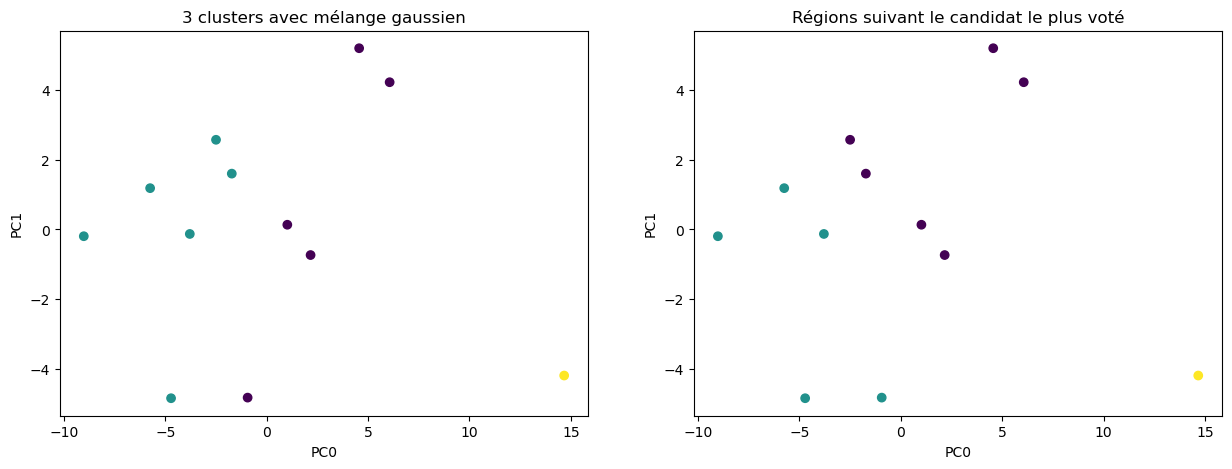

Le 1er cluster contient:
Nouvelle-Aquitaine
Auvergne-Rhône-Alpes
Bretagne
Occitanie
Pays de la Loire
Le 2 ème cluster contient:
Grand Est
Bourgogne-Franche-Comté
Centre-Val de Loire
Hauts-de-France
Normandie
Provence-Alpes-Côte d'Azur
Le 3 ème cluster contient:
Île-de-France


In [360]:
candidats1=candidats[0:13,:]
n=3
gmm = GaussianMixture(n)
gmm.fit(candidats1[1:,:])

labels = gmm.predict(candidats1[1:,:])
pca = PCA(n_components=2)
pca_data1 = pca.fit_transform(candidats1[1:,:])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.scatter(pca_data1[:,0], pca_data1[:,1], c=labels)
ax1.set_title('3 clusters avec mélange gaussien')
ax1.set_xlabel('PC0')
ax1.set_ylabel('PC1')

indices=[]
for j in range(12):
    indices.append(np.argmax(candidats1[j+1,[3,5,7]]))
ax2.set_title('Régions suivant le candidat le plus voté')
ax2.set_xlabel('PC0')
ax2.set_ylabel('PC1')
ax2.scatter(pca_data1[:,0], pca_data1[:,1], c=indices)

plt.show()

print('Le 1er cluster contient:')
indices=(labels==0)
indices=[int(j) for j in indices]
for j in range(12):
    if indices[j]==1:
            print(dataset[j+1,1])
for i in range(1,n):
    print('Le',i+1,'ème cluster contient:')
    indices=(labels==i)
    indices=[int(j) for j in indices]
    for j in range(12):
        if indices[j]==1:
            print(dataset[j+1,1])

Cette fois ci, le programme n'arrive non plus à faire une distinction exacte mais on voit bien que même en éxecutant plusieurs fois, la région Île-de-France est toujours seule dans un cluster parce qu'elle est la seule à avoir une domination de la part de Mélenchon.

### Utilisation de BIC pour le choix du modèle optimal

On sait que le nombre de composantes du mélange gaussien ne corréspond par forcèment au nombre de cluster.
On utilise donc le BIC pour trouver le nombre de composante optimal.

C:\Users\Mr K\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


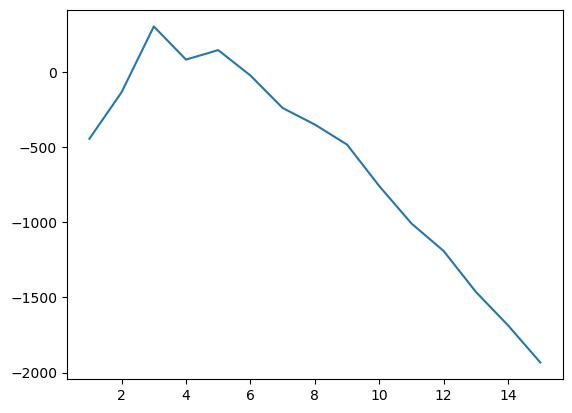

In [332]:
bic=[]
for i in range(15):
    gmm = GaussianMixture(i+1)
    gmm.fit(candidats[1:,:].astype('float'))
    bic.append(-gmm.bic(candidats[1:,:].astype('float')))
plt.plot(np.arange(1,16,1),bic)

In [364]:
n_opt=np.argmax(bic)+1
print('On trouve ainsi que le nombre optimal de composantes est:',n_opt)

On trouve ainsi que le nombre optimal de composantes est: 3


En vrai en éxecutant plusieurs fois, on trouve que le BIC varie légèrement mais rest en géneral proche de 3.
Ceci indique qu'on admet deja le nombre optimal de composantes dans le modèle Gausien